In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else (x))

In [ ]:
dfdaus = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

dfdaus = dfdaus.dropna(subset= 'salary_year_avg')

dfdaus = dfdaus.explode('job_skills')


dfg = dfdaus.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])



In [9]:
dfg

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [24]:
toppay = dfg.sort_values('median', ascending = False).head(10)

topcount = dfg.sort_values('count', ascending = False).head(10).sort_values('median', ascending = False).head(10)

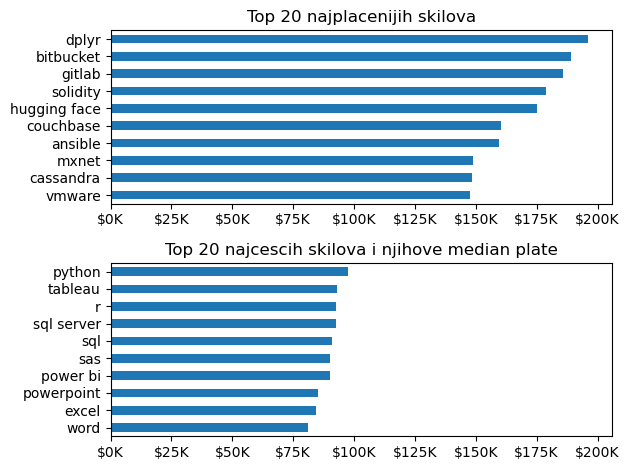

In [33]:
fig, ax = plt.subplots(2,1)

toppay.plot(kind='barh', y='median', legend = False, ax=ax[0])
ax[0].set_title('Top 20 najplacenijih skilova')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))



topcount.plot(kind='barh', y='median', legend = False, ax=ax[1])



ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 20 najcescih skilova i njihove median plate')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:f'${int(x/1000)}K'))



for axes in ax:
    axes.invert_yaxis()
fig.tight_layout()

